<center> <h1 style='color:yellow;'> Cours 11 : Problème de Regression  </h1> </center>    

CRIM - taux de criminalité par habitant par ville
ZN - proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pi.ca.
INDUS - proportion d'acres de superficie commerciale non commerciale par ville.
CHAS - Variable fictive de la rivière Charles (1 si la zone est délimitée par la rivière ; 0 sinon)
NOX - concentration en oxydes nitriques (parties pour 10 millions)
RM - nombre moyen de pièces par logement
ÂGE - proportion de logements occupés par leur propriétaire construits avant 1940
DIS - distances pondérées vers cinq centres d'emploi de Boston
RAD - indice d'accessibilité aux autoroutes radiales
TAXE - taux d'imposition foncière sur la valeur totale par tranche de 10 000 $
PTRATIO - ratio élèves-enseignant par ville
B - 1000(Bk - 0,63)^2 où Bk est la proportion de Noirs par ville
LSTAT - % de statut inférieur de la population
MEDV - Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars

In [8]:
from pandas import read_csv
import pandas as pd
try:
           
    fichier='housing.csv'
    col=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAXE','PTRATIO','B','LSTAT','MEDV']
    data=read_csv(fichier,delim_whitespace=True,names=col)
    pd.set_option('display.max_columns',None)
    pd.set_option('display.float_format','{:.2f}'.format)
    print(data)
except:
    print('Erreur de lecture du fichier')

     CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD   TAXE  PTRATIO      B  \
0    0.01 18.00   2.31     0 0.54 6.58 65.20 4.09    1 296.00    15.30 396.90   
1    0.03  0.00   7.07     0 0.47 6.42 78.90 4.97    2 242.00    17.80 396.90   
2    0.03  0.00   7.07     0 0.47 7.18 61.10 4.97    2 242.00    17.80 392.83   
3    0.03  0.00   2.18     0 0.46 7.00 45.80 6.06    3 222.00    18.70 394.63   
4    0.07  0.00   2.18     0 0.46 7.15 54.20 6.06    3 222.00    18.70 396.90   
..    ...   ...    ...   ...  ...  ...   ...  ...  ...    ...      ...    ...   
501  0.06  0.00  11.93     0 0.57 6.59 69.10 2.48    1 273.00    21.00 391.99   
502  0.05  0.00  11.93     0 0.57 6.12 76.70 2.29    1 273.00    21.00 396.90   
503  0.06  0.00  11.93     0 0.57 6.98 91.00 2.17    1 273.00    21.00 396.90   
504  0.11  0.00  11.93     0 0.57 6.79 89.30 2.39    1 273.00    21.00 393.45   
505  0.05  0.00  11.93     0 0.57 6.03 80.80 2.50    1 273.00    21.00 396.90   

     LSTAT  MEDV  
0     4.

C:\Users\fayem\AppData\Local\Temp\ipykernel_688\875294920.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=read_csv(fichier,delim_whitespace=True,names=col)


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAXE,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [10]:
data.shape

(506, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAXE     506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAXE,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAXE,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

dataML=data.values

x=dataML[:,:-1]
y=dataML[:,-1]

test=0.2
seed=11

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test,random_state=seed)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)

print(f'MAE : {round(MAE,4)}')
print(f'MSE : {round(MSE,4)}')
print(f'R2 : {round(R2*100,4)} %')

MAE : 3.5673
MSE : 26.9448
R2 : 68.595 %


In [14]:
import numpy as np
maison=[0.22489,12.50,7.870,0,0.5240,6.3770,94.30,6.3467,5,311.0,15.20,392.52,20.45]
maison_array=np.array([maison])
pred=model.predict(maison_array)[0]
print(f'Prix : {pred} ---- [{pred-MAE},{pred+MAE}]')

Prix : 19.429699102188902 ---- [15.862373083192105,22.997025121185697]


# Evaluation comparative

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

dataML=data.values

x=dataML[:,:-1]
y=dataML[:,-1]

test=0.2
seed=11
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test,random_state=seed)

metrics=[]
metrics.append(('MAE',mean_absolute_error))
metrics.append(('MSE',mean_squared_error))
metrics.append(('R2',r2_score))

models=[]
models.append(('LR',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('Ridge',Ridge()))
models.append(('D-Tree',DecisionTreeRegressor()))
models.append(('KNN-R',KNeighborsRegressor(n_neighbors=15)))
models.append(('SVM-R',SVR()))




 <h1 > Cours 12   </h1>

 <h1 > 1. La validation croisée  </h1>

In [16]:
from sklearn.model_selection import cross_validate, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

dataML = data.values

x = dataML[:, :-1]
y = dataML[:, -1]

test = 0.2
seed = 11
cv = KFold(n_splits=10, shuffle=True, random_state=seed)

model = LinearRegression()

y_pred = cross_val_predict(model, x, y, cv=cv)

MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print(f'MAE : {round(MAE, 4)}')
print(f'MSE : {round(MSE, 4)}')
print(f'R2 : {round(R2 * 100, 4)} %')


MAE : 3.4057
MSE : 24.0621
R2 : 71.497 %


 <h1 > 1. La validation croisée  </h1>


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

# StandardScaler------------------------
scaler=StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

test=0.2
seed=11
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test,random_state=seed)

metrics=[]
metrics.append(('MAE',mean_absolute_error))
metrics.append(('MSE',mean_squared_error))
metrics.append(('R2',r2_score))

models=[]
models.append(('LR',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('Ridge',Ridge()))
models.append(('D-Tree',DecisionTreeRegressor()))
models.append(('KNN-R',KNeighborsRegressor(n_neighbors=15)))
models.append(('SVM-R',SVR()))

# Evaluation------------------------
for metric_name, metric in metrics:
    print(f'{metric_name}\n------\n')
    for model_name, model in models:
        model.fit(x_train_scaler,y_train)
        y_pred = model.predict(x_test_scaler)
        error = metric(y_test,y_pred)
        print(f'{model_name}: {round(error,3)}')


MAE
------

LR: 3.567
Lasso: 3.811
Ridge: 3.56
D-Tree: 3.09
KNN-R: 3.005
SVM-R: 3.021
MSE
------

LR: 26.945
Lasso: 30.411
Ridge: 26.935
D-Tree: 19.568
KNN-R: 24.773


SVM-R: 26.971
R2
------

LR: 0.686
Lasso: 0.646
Ridge: 0.686
D-Tree: 0.781
KNN-R: 0.711
SVM-R: 0.686


 <h1 > 1. EVALUATION croisée  </h1>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, Binarizer
from sklearn.datasets import load_diabetes

# Charger un dataset de test
data = load_diabetes()
x = data.data
y = data.target

# Split
test = 0.2
seed = 11
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test, random_state=seed)

# Métriques
metrics = [
    ('MAE', mean_absolute_error),
    ('MSE', mean_squared_error),
    ('R2', r2_score)
]

# Scalers
scalers = [
    ('Aucun', None),
    ('StandardScaler', StandardScaler()),
    ('Normalizer', Normalizer()),
    ('MinMaxScaler', MinMaxScaler()),
    ('Binarizer', Binarizer())
]

# Modèles
models = [
    ('LR', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('D-Tree', DecisionTreeRegressor()),
    ('KNN-R', KNeighborsRegressor(n_neighbors=15)),
    ('SVM-R', SVR())
]

# Évaluation
resultats = []

for scaler_name, scaler in scalers:
    if scaler is not None:
        scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train)
        x_test_scaled = scaler.transform(x_test)
    else:
        x_train_scaled = x_train
        x_test_scaled = x_test

    for model_name, model in models:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)

        for metric_name, metric in metrics:
            score = metric(y_test, y_pred)
            resultats.append({
                'Preprocessing': scaler_name,
                'Model': model_name,
                'Metric': metric_name,
                'Score': round(score, 4)
            })

df = pd.DataFrame(resultats)
table_pivot = df.pivot_table(index=['Preprocessing', 'Model'], columns='Metric', values='Score').reset_index()
print(table_pivot)


Metric   Preprocessing   Model   MAE     MSE   R2
0                Aucun  D-Tree 64.81 6283.82 0.17
1                Aucun   KNN-R 48.75 3534.77 0.53
2                Aucun      LR 45.34 3212.59 0.58
3                Aucun   Lasso 60.42 4903.16 0.35
4                Aucun   Ridge 53.83 3982.11 0.48
5                Aucun   SVM-R 68.18 6248.26 0.18
6            Binarizer  D-Tree 59.85 6400.02 0.16
7            Binarizer   KNN-R 54.89 4165.93 0.45
8            Binarizer      LR 51.65 3873.15 0.49
9            Binarizer   Lasso 52.96 3971.45 0.48
10           Binarizer   Ridge 51.71 3872.29 0.49
11           Binarizer   SVM-R 68.48 6213.13 0.18
12        MinMaxScaler  D-Tree 64.72 6446.85 0.15
13        MinMaxScaler   KNN-R 50.22 3609.92 0.52
14        MinMaxScaler      LR 45.34 3212.59 0.58
15        MinMaxScaler   Lasso 48.22 3447.11 0.55
16        MinMaxScaler   Ridge 46.04 3275.60 0.57
17        MinMaxScaler   SVM-R 69.74 6515.35 0.14
18          Normalizer  D-Tree 62.70 6419.75 0.16


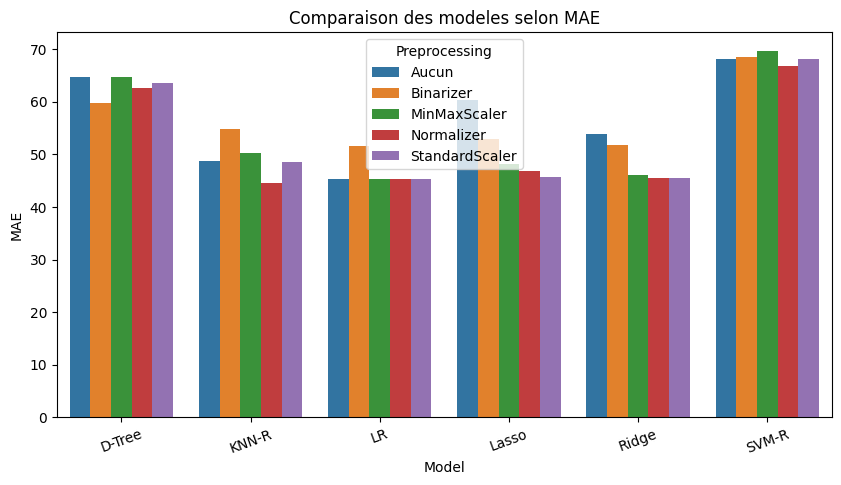

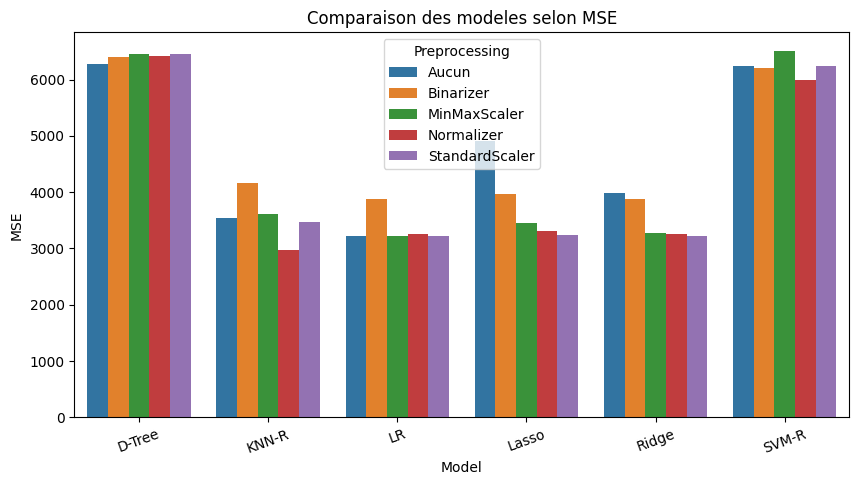

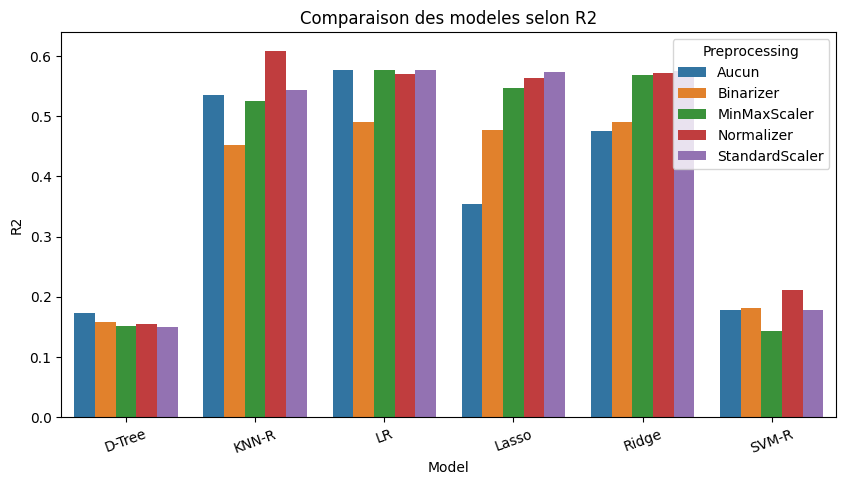

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for metric in ['MAE','MSE','R2']:
    plt.figure(figsize=(10,5))
    sns.barplot(data=table_pivot,x='Model',y=metric,hue='Preprocessing')
    plt.title(f'Comparaison des modeles selon {metric}')
    plt.xticks(rotation=20)
    plt.show()